In [28]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import math
from scipy.integrate import odeint
import pandas as pd
import seaborn
from scipy import stats

In [29]:
df = pd.read_csv('AllResistanceGenes.csv')

In [30]:
print(np.size(df,0))#.Antimicrobial_resistance_chromosome[i]

34688


In [31]:
ARGChro=np.zeros(np.size(df,0))
BioChro=np.zeros(np.size(df,0))
ARGPlas=np.zeros(np.size(df,0))
BioPlas=np.zeros(np.size(df,0))
PlasTotal=np.zeros(np.size(df,0))
PlasNum=np.zeros(np.size(df,0))
for i in range(np.size(df,0)):
    ARGChro[i]=df.Antimicrobial_resistance_chromosome[i]
    BioChro[i]=df.biofilm_chromosome[i]
    ARGPlas[i]=df.Antimicrobial_resistance_plasmid[i]
    BioPlas[i]=df.biofilm_plasmid[i]
    PlasTotal[i]=df.plasmid_total_size[i]
    PlasNum[i]=df.plasmid_count[i]

In [32]:
x00=0
x01=0
x10=0
x11=0

PP0ARGPlas=[]
PP0ARGPerPlas=[]
PP1ARGPlas=[]
PP0ARGChro=[]
PP1ARGChro=[]
PP0ARGTot=[]
PP1ARGTot=[]
PP0PlasNum=[]
PP1PlasNum=[]
PP0PlasTotalSize=[]
PP1PlasTotalSize=[]
PP1ARGPerPlas=[]

for i in range(len(BioChro)):
    if BioChro[i]+BioPlas[i]==0 and PlasNum[i]==0:
        x00=x00+1
        #PP0ARGPlas.append(ARGPlas[i])
        PP0ARGChro.append(ARGChro[i])
        PP0ARGTot.append(ARGPlas[i]+ARGChro[i])
        PP0PlasNum.append(PlasNum[i])
        PP0PlasTotalSize.append(PlasTotal[i])
    if BioChro[i]+BioPlas[i]==0 and PlasNum[i]>0:
        x01=x01+1
        PP0ARGPlas.append(ARGPlas[i])
        PP0ARGPerPlas.append(ARGPlas[i]/PlasNum[i])
        PP0ARGChro.append(ARGChro[i])
        PP0ARGTot.append(ARGPlas[i]+ARGChro[i])
        PP0PlasNum.append(PlasNum[i])
        PP0PlasTotalSize.append(PlasTotal[i])
    if BioChro[i]+BioPlas[i]>0 and PlasNum[i]==0:
        x10=x10+1
        #PP1ARGPlas.append(ARGPlas[i])
        PP1ARGChro.append(ARGChro[i])
        PP1ARGTot.append(ARGPlas[i]+ARGChro[i])
        PP1PlasNum.append(PlasNum[i])
        PP1PlasTotalSize.append(PlasTotal[i])
    if BioChro[i]+BioPlas[i]>0 and PlasNum[i]>0:
        x11=x11+1
        PP1ARGPlas.append(ARGPlas[i])
        PP1ARGPerPlas.append(ARGPlas[i]/PlasNum[i])
        PP1ARGChro.append(ARGChro[i])
        PP1ARGTot.append(ARGPlas[i]+ARGChro[i])
        PP1PlasNum.append(PlasNum[i])
        PP1PlasTotalSize.append(PlasTotal[i])

In [33]:
print(np.mean(PP0PlasNum))
print(x01/(x00+x01))
print(x11/(x10+x11))

0.7974126608878382
0.3203309692671395
0.5255909558067832


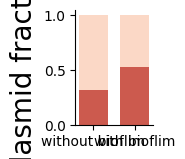

In [34]:
plt.figure(figsize=(1,1.5))
y1=[x01/(x00+x01),x11/(x10+x11)]
y2=[x00/(x00+x01),x10/(x10+x11)]
x=['without bioflim','with bioflim']
plt.bar(x, y1, color='#CC5A4E',width=0.7)
plt.bar(x, y2, bottom=y1, color='#FBD8C6',width=0.7)
plt.ylabel('plasmid fraction',fontsize=20)
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 
plt.tick_params(direction='out')
plt.savefig('AllResistanceGenes_1.pdf')
plt.show()


1.564669939850073e-274


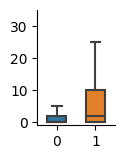

In [35]:
plt.figure(figsize=(1,1.5))
seaborn.boxplot([PP0ARGPlas,PP1ARGPlas],fliersize=0,width=0.5)
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 
plt.tick_params(direction='out')
plt.ylim(-1,35)
tstat, pval = stats.ttest_ind(a=PP0ARGPlas, b=PP1ARGPlas, alternative="two-sided")
plt.savefig('AllResistanceGenes_4.pdf')
print(pval)

1.564669939850073e-274


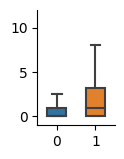

In [36]:
plt.figure(figsize=(1,1.5))
seaborn.boxplot([PP0ARGPerPlas,PP1ARGPerPlas],fliersize=0,width=0.5)
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 
plt.tick_params(direction='out')
plt.ylim(-1,12)
tstat, pval = stats.ttest_ind(a=PP0ARGPlas, b=PP1ARGPlas, alternative="two-sided")
plt.savefig('AllResistanceGenes_5.pdf')
print(pval)

0.0


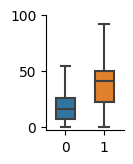

In [37]:
plt.figure(figsize=(1,1.5))
seaborn.boxplot([PP0ARGChro,PP1ARGChro],fliersize=0,width=0.5)
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 
plt.tick_params(direction='out')
plt.ylim(-3,100)
tstat, pval = stats.ttest_ind(a=PP0ARGChro, b=PP1ARGChro, alternative="two-sided")
plt.savefig('AllResistanceGenes_6.pdf')
print(pval)

0.0


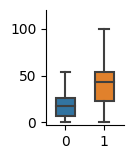

In [38]:
plt.figure(figsize=(1,1.5))
seaborn.boxplot([PP0ARGTot,PP1ARGTot],fliersize=0,width=0.5)
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 
plt.tick_params(direction='out')
plt.ylim(-3,120)
tstat, pval = stats.ttest_ind(a=PP0ARGTot, b=PP1ARGTot, alternative="two-sided")
plt.savefig('AllResistanceGenes_7.pdf')
print(pval)

0.0


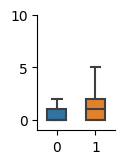

In [39]:
plt.figure(figsize=(1,1.5))
seaborn.boxplot([PP0PlasNum,PP1PlasNum],fliersize=0,width=0.5)
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 
plt.tick_params(direction='out')
plt.ylim(-1,10)
tstat, pval = stats.ttest_ind(a=PP0ARGTot, b=PP1ARGTot, alternative="two-sided")
plt.savefig('AllResistanceGenes_2.pdf')
print(pval)

0.0


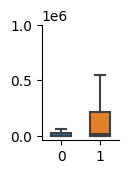

In [40]:
plt.figure(figsize=(1,1.5))
seaborn.boxplot([PP0PlasTotalSize,PP1PlasTotalSize],fliersize=0,width=0.5)
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 
plt.tick_params(direction='out')
plt.ylim(-0.4*10**5,10*10**5)
#plt.yscale('log')
tstat, pval = stats.ttest_ind(a=PP0ARGTot, b=PP1ARGTot, alternative="two-sided")
plt.savefig('AllResistanceGenes_3.pdf')
print(pval)